In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
df = pd.read_csv("boston_housing.csv")

In [3]:
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [4]:
X = df.drop("MEDV", axis=1)
y = df["MEDV"]


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
model = Sequential([
    Dense(64, activation='relu', input_shape = (X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)
])

C:\Users\Asus\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,121 (20.00 KB)

 Trainable params: 5,121 (20.00 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [10]:
history = model.fit(X_train, y_train, epochs=10, batch_size = 42, validation_split=0.2, verbose=1)

Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 579.0412 - mae: 22.1836 - val_loss: 528.0742 - val_mae: 21.4101
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 542.2985 - mae: 21.2988 - val_loss: 494.4902 - val_mae: 20.6177
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 510.3490 - mae: 20.6918 - val_loss: 455.3268 - val_mae: 19.6702
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 455.3054 - mae: 19.2537 - val_loss: 408.1258 - val_mae: 18.4785
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 425.5158 - mae: 18.4215 - val_loss: 351.8708 - val_mae: 16.9660
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 391.7674 - mae: 17.5625 - val_loss: 287.7907 - val_mae: 15.1885
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 291.4057 - mae: 14.8350 - val_loss: 220.4809 - val_mae: 13.0655
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 230.3431 - mae: 12.5841 - val_loss: 155.4713 - val_mae: 10.6360
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [11]:
test_mse, test_mae = model.evaluate(X_test, y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 56.9455 - mae: 6.1755 


In [17]:
test_mae

6.333231449127197

In [18]:
test_mse

63.01182556152344

In [13]:
y_pred = model.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [16]:
y_pred.flatten()[:10]

array([16.294859 , 29.756018 , 16.158667 , 18.406305 , 14.657127 ,
        9.478418 ,  9.547414 , 13.885141 , 12.3735485,  9.003113 ],
      dtype=float32)

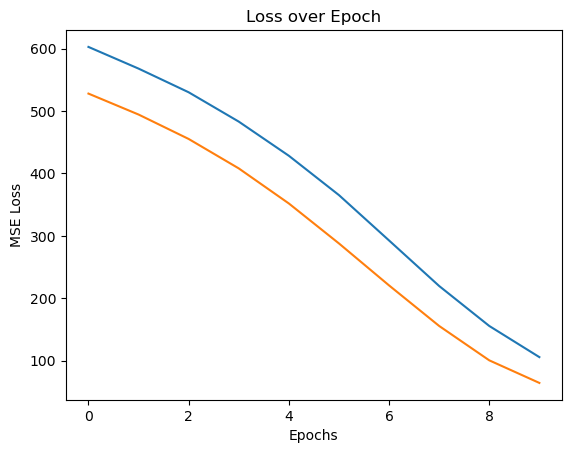

In [20]:
plt.plot(history.history['loss'], label=['Train loss'])
plt.plot(history.history['val_loss'] , label=['Validation loss'])
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.title('Loss over Epoch')

plt.show()